# Classifying Wine Varieties with KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1.โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('Wine.csv', names=['Class','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proacthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline'])
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proacthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proacthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
df.tail(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proacthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


In [5]:
df.sample(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proacthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
26,1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
43,1,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680
15,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
53,1,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
100,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
144,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


## 3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

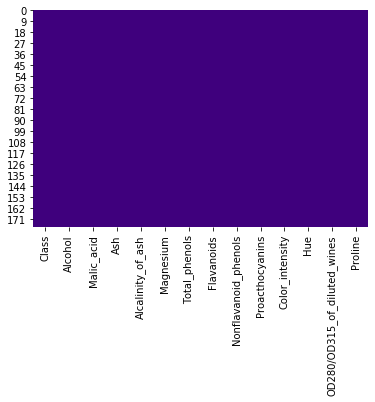

In [6]:
# check missing values with heatmap
sns.heatmap(df.isnull(),cmap='Purples_r', cbar=False)

## 4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proacthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [8]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proacthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

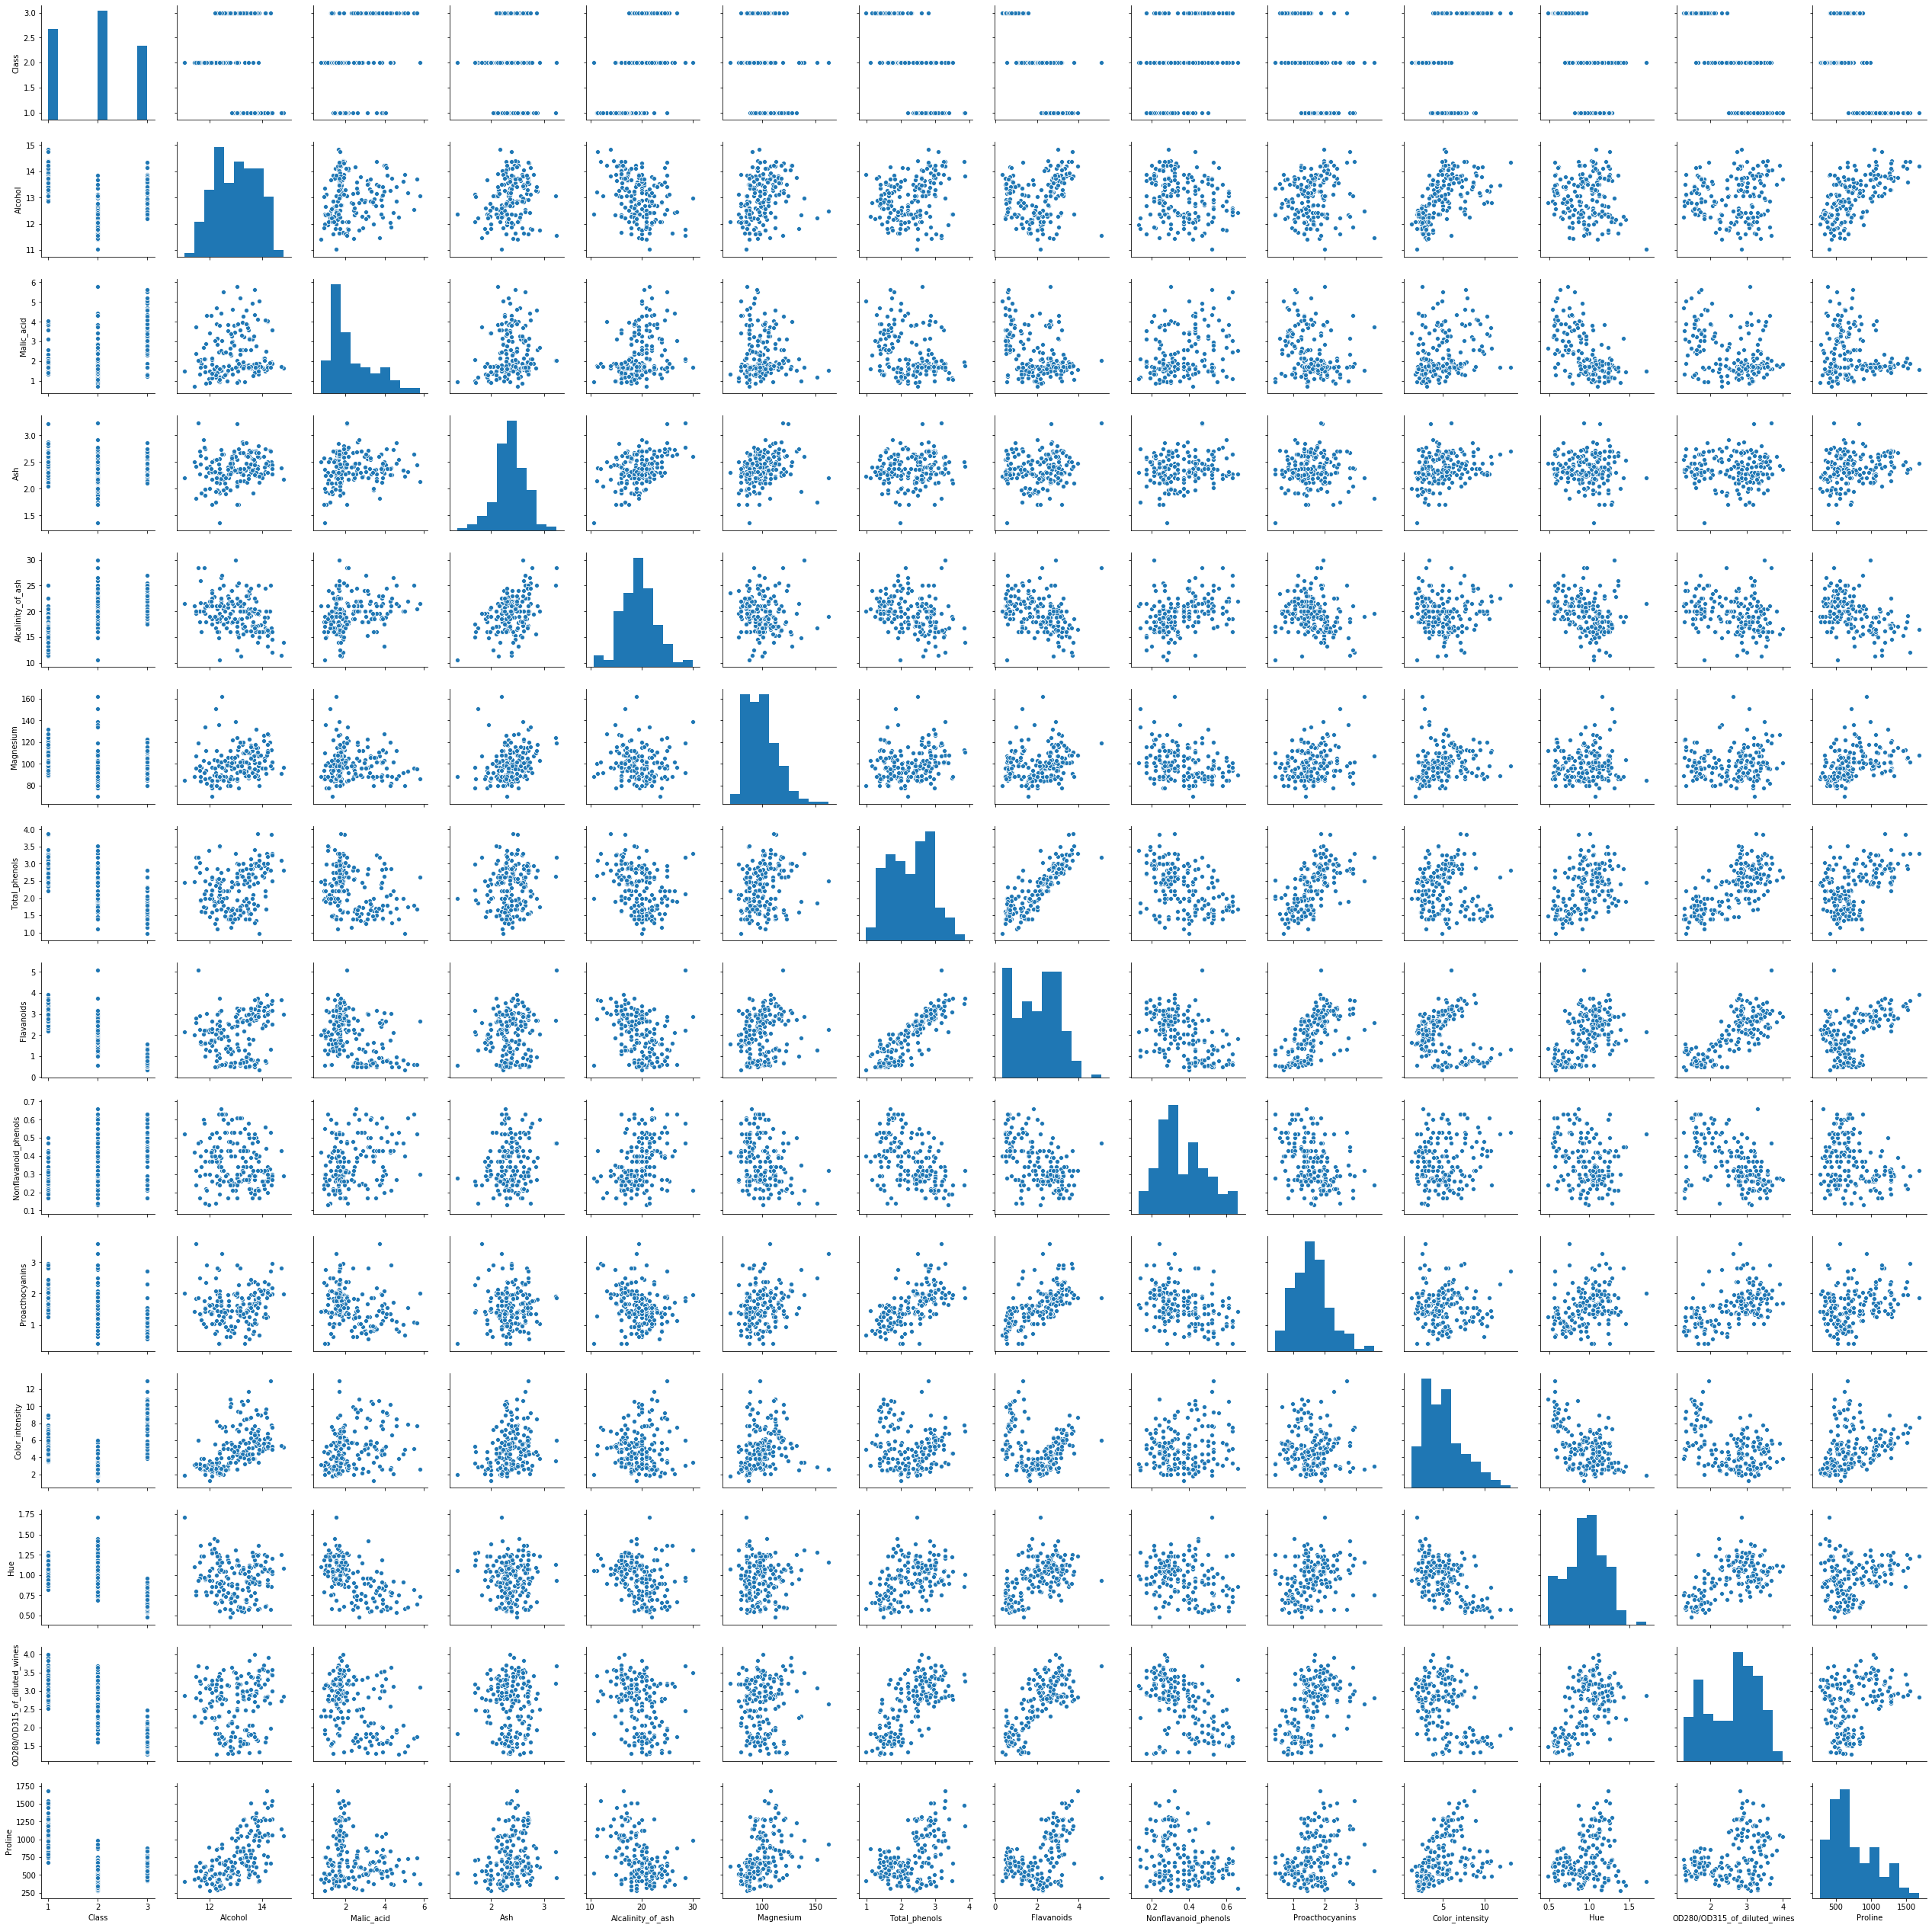

In [9]:
sns.pairplot(df)

## 6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

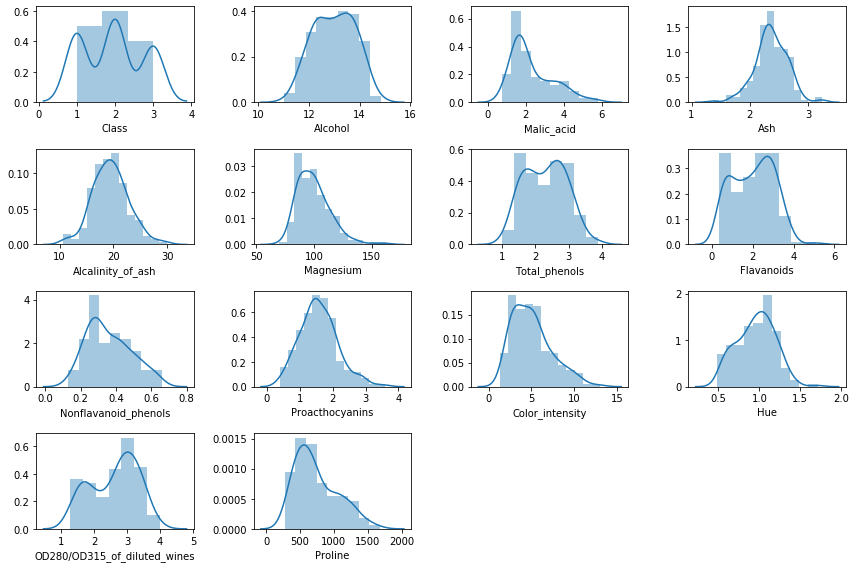

In [10]:
fig = plt.figure(figsize=(12,8))
i = 1
for col in df.columns :
    plt.subplot(4,4,i)
    sns.distplot(df[col])
    i+=1
fig.tight_layout()
plt.show()

## 7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

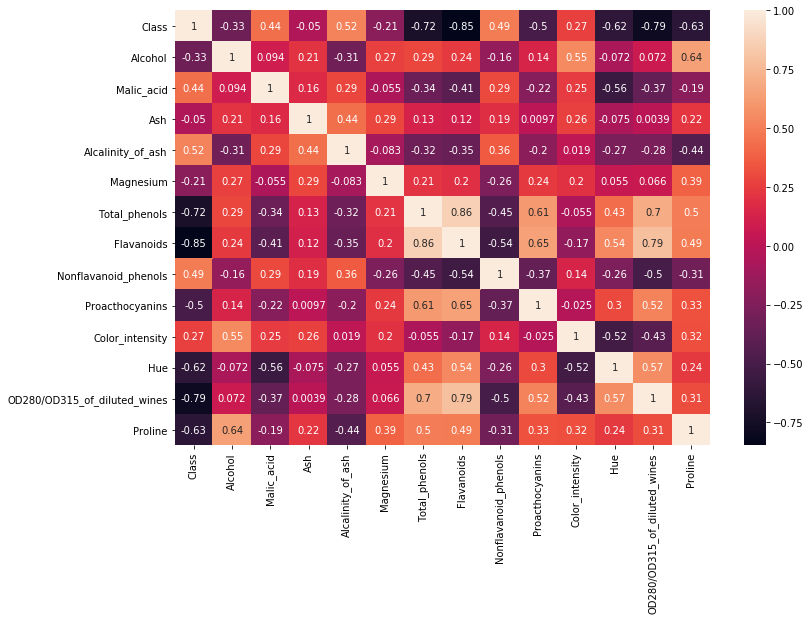

In [11]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

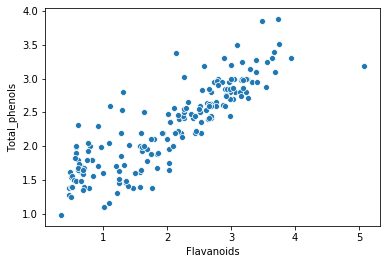

In [12]:
# most correlated pair : Flavonoids and Total_Phenols
sns.scatterplot(df['Flavanoids'], df['Total_phenols'])

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

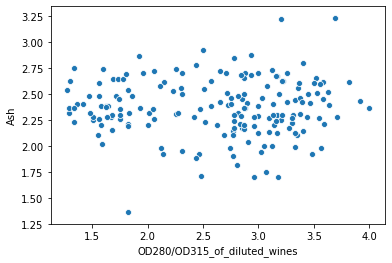

In [13]:
# least correlated pair : OD280/OD315_of_diluted_wines and Ash
sns.scatterplot(df['OD280/OD315_of_diluted_wines'], df['Ash'])

## 10. สร้าง histogram ของ feature ที่สนใจ

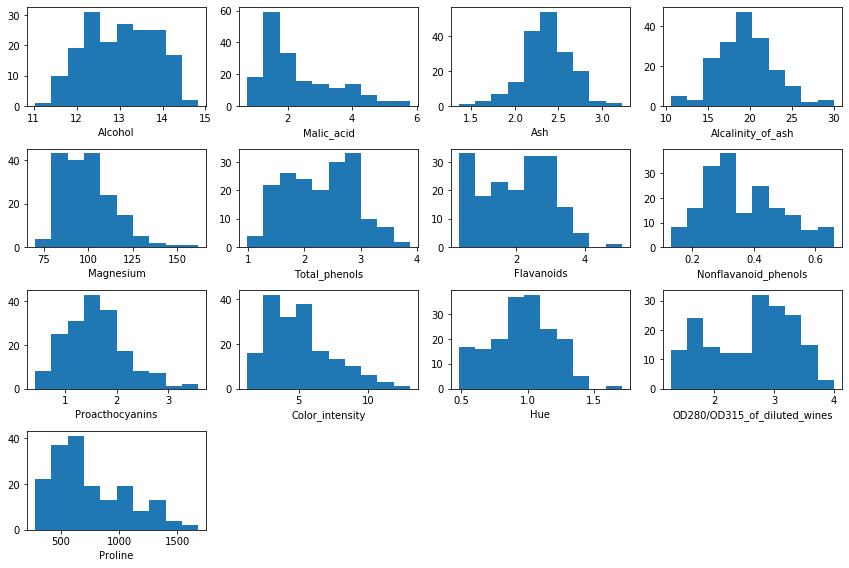

In [14]:
fig = plt.figure(figsize=(12,8))
i = 1
for col in df.columns :
    if col != 'Class':
        plt.subplot(4,4,i)
        plt.hist(df[col])
        plt.xlabel(col)
        i+=1
fig.tight_layout()
plt.show()

## 11. สร้าง box plot ของ features ที่สนใจ

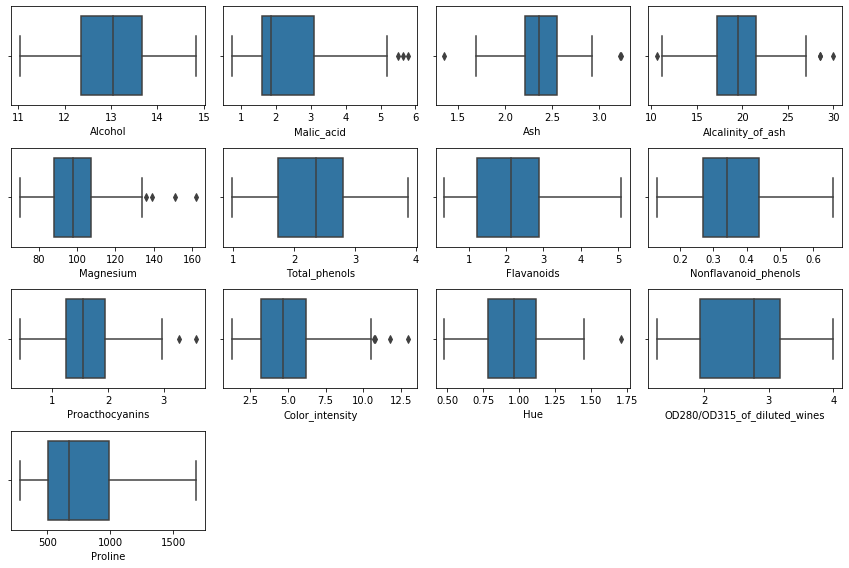

In [15]:
fig = plt.figure(figsize=(12,8))
i = 1
for col in df.columns :
    if col != 'Class':
        plt.subplot(4,4,i)
        sns.boxplot(df[col])
        i+=1
fig.tight_layout()
plt.show()

## 12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [16]:
from sklearn.model_selection import train_test_split

In [87]:
# เลือก independent variables และ dependent variable
X = df.drop(['Class'], axis=1).copy()
y = df['Class'].copy()

# create 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (124, 13)
y_train shape :  (124,)
X_test shape :  (54, 13)
y_test shape :  (54,)


## 13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

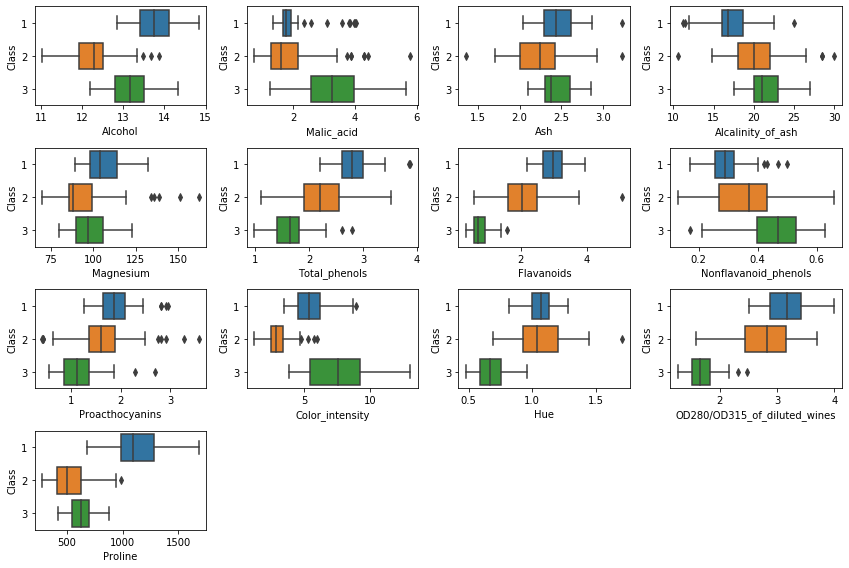

In [88]:
fig = plt.figure(figsize=(12,8))
i = 1
for col in df.columns :
    if col != 'Class':
        plt.subplot(4,4,i)
        sns.boxplot(data=df, x=col, y='Class',orient='h')
        i+=1
fig.tight_layout()
plt.show()

## 14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควร พร้อมให้เหตุผล

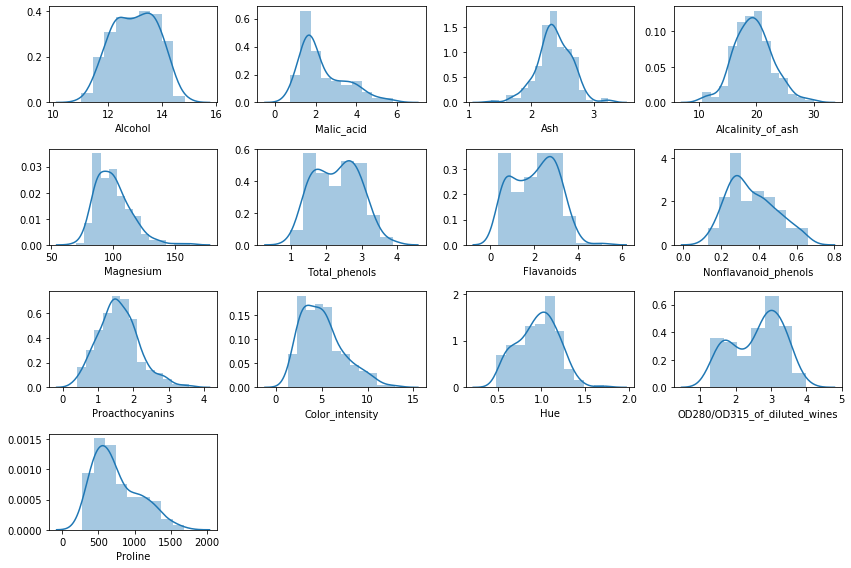

In [19]:
fig = plt.figure(figsize=(12,8))
i = 1
for col in df.columns :
    if col != 'Class':
        plt.subplot(4,4,i)
        sns.distplot(df[col])
        i+=1
fig.tight_layout()
plt.show()

Note :  
* Malic_acid, Ash, magnesium, Color_intensity, and Proline มี skewness ทำ standardization ก็ไม่สามารถลด skewness ได้  
* Alcohol, Total_phenols, Flavanoids, Nonflavanoid_phenols, Hue และ OD280/OD315_of_diluted_wines ไม่ได้เป็น normal distribution ควรใช้ min-max scaler
* Alcalinity_of_ash, Proacthocyanins มี distribution คล้าย normal distribution สามารถทำ standardization ได้

## 15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)

In [46]:
from sklearn.preprocessing import  MinMaxScaler

In [89]:
# เลือกทำ normalization ด้วย MinMaxScaler
sc_X = MinMaxScaler()

# fit transform X_train
X_train_sc = sc_X.fit_transform(X_train)
# transform X_test
X_test_sc = sc_X.transform(X_test)

In [90]:
X_train_sc

array([[0.16578947, 0.22529644, 0.14379085, ..., 0.6097561 , 0.34117647,
        0.12175325],
       [0.65263158, 0.20948617, 0.62091503, ..., 0.50406504, 0.62745098,
        0.66314935],
       [0.70526316, 0.97035573, 0.49019608, ..., 0.1300813 , 0.18431373,
        0.375     ],
       ...,
       [0.25526316, 0.15217391, 0.47058824, ..., 0.46341463, 0.54117647,
        0.13961039],
       [0.74473684, 0.12055336, 0.37254902, ..., 0.43089431, 0.89411765,
        0.62256494],
       [0.53947368, 0.62450593, 0.43137255, ..., 0.07317073, 0.02352941,
        0.22077922]])

In [91]:
X_test_sc

array([[ 0.19210526,  0.38339921,  0.79738562,  0.46808511,  0.35869565,
         0.23381295,  0.33839479,  0.88679245,  0.20189274,  0.21501706,
         0.6097561 ,  0.48235294,  0.26704545],
       [ 0.56315789,  0.36561265,  0.4379085 ,  0.46808511,  0.54347826,
         0.19784173,  0.04555315,  0.75471698,  0.33123028,  0.68430034,
         0.09756098,  0.1372549 ,  0.45616883],
       [ 0.70526316,  0.22134387,  0.43137255,  0.28723404,  0.33695652,
         0.54316547,  0.52277657,  0.26415094,  0.40378549,  0.21501706,
         0.51219512,  1.07058824,  0.61444805],
       [ 0.5       ,  0.40909091,  0.65359477,  0.5212766 ,  0.2826087 ,
         0.15827338,  0.00650759,  0.75471698,  0.10725552,  0.28327645,
         0.23577236,  0.40784314,  0.26136364],
       [ 0.39473684,  0.94268775,  0.61437908,  0.73404255,  0.2826087 ,
         0.24820144,  0.02819957,  0.94339623,  0.21766562,  0.31740614,
         0.27642276,  0.16470588,  0.19237013],
       [ 0.88421053,  0.223320

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
# define model
clf = KNeighborsClassifier(n_neighbors=5)
# fit model
clf.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [93]:
# make prediction
y_pred_norm = clf.predict(X_test_sc)

## 16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [29]:
from sklearn import metrics

In [94]:
cm = metrics.confusion_matrix(y_test, y_pred_norm)
accuracy = metrics.accuracy_score(y_test, y_pred_norm)
f1 = metrics.f1_score(y_test, y_pred_norm, average='micro')
precision = metrics.precision_score(y_test, y_pred_norm, average='micro')
recall = metrics.recall_score(y_test, y_pred_norm, average='micro')

print('Confusion metrix : \n', cm)
print('Accuracy : ', accuracy)
print('F1 score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

Confusion metrix : 
 [[20  0  0]
 [ 0 15  1]
 [ 0  0 18]]
Accuracy :  0.9814814814814815
F1 score :  0.9814814814814815
Precision :  0.9814814814814815
Recall :  0.9814814814814815


## 17. หาค่า K ที่ดีที่สุด สำหรับ Dataset นี้

In [95]:
accuracy = []
for k in range(1, 30):
    # define model
    clf = KNeighborsClassifier(n_neighbors=k)
    # fit model
    clf.fit(X_train_sc, y_train)
    # make prediction
    y_pred = clf.predict(X_test_sc)
    # accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)

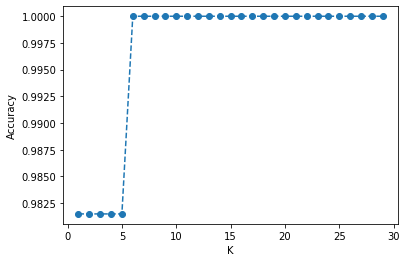

Max accuracy :  1.0  at K =  5


In [96]:
plt.plot(range(1,30), accuracy, marker='o', linestyle='dashed')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
print('Max accuracy : ', max(accuracy), ' at K = ', np.argmax(accuracy))

## 18. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features

In [97]:
# เลือก features จาก correlation with y
corr = X_train.corrwith(y_train).abs().sort_values(ascending=False)
corr

Flavanoids                      0.817868
OD280/OD315_of_diluted_wines    0.764027
Total_phenols                   0.681971
Proline                         0.623645
Hue                             0.567170
Proacthocyanins                 0.521971
Alcalinity_of_ash               0.482306
Malic_acid                      0.422800
Nonflavanoid_phenols            0.400002
Alcohol                         0.309032
Color_intensity                 0.274614
Magnesium                       0.202144
Ash                             0.085383
dtype: float64

In [98]:
# เลือก features ที่มี correlation กับ y มากกว่า 0.5
features = corr[corr > 0.5].index.values
print(features)

['Flavanoids' 'OD280/OD315_of_diluted_wines' 'Total_phenols' 'Proline'
 'Hue' 'Proacthocyanins']


In [99]:
#normalization of selected features
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train[features])
X_test_sc = sc_X.transform(X_test[features])

# define model
clf = KNeighborsClassifier(n_neighbors=5)
# fit model
clf.fit(X_train_sc, y_train)
# make prediction
y_pred_norm_feature = clf.predict(X_test_sc)

cm = metrics.confusion_matrix(y_test, y_pred_norm_feature)
accuracy = metrics.accuracy_score(y_test, y_pred_norm_feature)
f1 = metrics.f1_score(y_test, y_pred_norm_feature, average='micro')
precision = metrics.precision_score(y_test, y_pred_norm_feature, average='micro')
recall = metrics.recall_score(y_test, y_pred_norm_feature, average='micro')

print('Confusion metrix : \n', cm)
print('Accuracy : ', accuracy)
print('F1 score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

Confusion metrix : 
 [[20  0  0]
 [ 2 13  1]
 [ 0  0 18]]
Accuracy :  0.9444444444444444
F1 score :  0.9444444444444444
Precision :  0.9444444444444444
Recall :  0.9444444444444444


In [100]:
# All-features model
cm = metrics.confusion_matrix(y_test, y_pred_norm)
accuracy = metrics.accuracy_score(y_test, y_pred_norm)
f1 = metrics.f1_score(y_test, y_pred_norm, average='micro')
precision = metrics.precision_score(y_test, y_pred_norm, average='micro')
recall = metrics.recall_score(y_test, y_pred_norm, average='micro')

print('Confusion metrix : \n', cm)
print('Accuracy : ', accuracy)
print('F1 score : ', f1)
print('Precision : ', precision)
print('Recall : ', recall)

Confusion metrix : 
 [[20  0  0]
 [ 0 15  1]
 [ 0  0 18]]
Accuracy :  0.9814814814814815
F1 score :  0.9814814814814815
Precision :  0.9814814814814815
Recall :  0.9814814814814815


Note :  
* เมื่อเลือกใช้ features ที่มี correlation กับ y ตั้งแต่ 0.5 ขึ้นไป ทำให้ได้ accuracy น้อยกว่า เมื่อใช้ all features

## 19. ทำ Visualization ของค่า K ค่าต่างๆ

In [101]:
accuracy = []
for k in range(1, 30):
    
    #normalization of selected features
    sc_X = MinMaxScaler()
    X_train_sc = sc_X.fit_transform(X_train[features])
    X_test_sc = sc_X.transform(X_test[features])
    
    # define model
    clf = KNeighborsClassifier(n_neighbors=k)
    # fit model
    clf.fit(X_train_sc, y_train)
    # make prediction
    y_pred = clf.predict(X_test_sc)
    
    # accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy.append(acc)

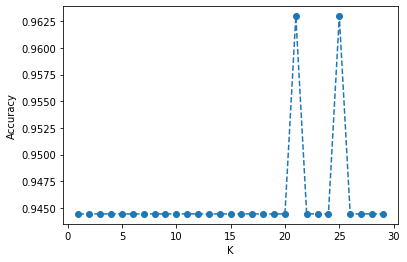

Max accuracy :  0.9629629629629629  at K =  20


In [102]:
plt.plot(range(1,30), accuracy, marker='o', linestyle='dashed')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
print('Max accuracy : ', max(accuracy), ' at K = ', np.argmax(accuracy))

## 20. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้

best feature set :  ['Flavanoids' 'OD280/OD315_of_diluted_wines' 'Total_phenols' 'Proline'
 'Hue' 'Proacthocyanins' 'Alcalinity_of_ash' 'Malic_acid'
 'Nonflavanoid_phenols' 'Alcohol']
minimum correlation with y =  0.3
Max accuracy :  1.0  at K =  1


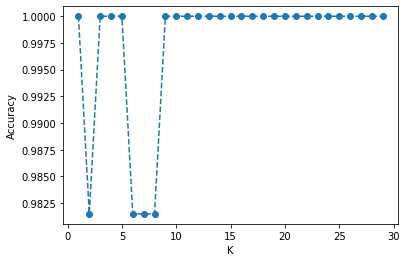

In [103]:
# พิจารณาที่ correlation ค่าต่างๆ
best_accuracy = 0
best_acc_set = []

for corr_thresh in [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    features = corr[corr > corr_thresh].index.values
    accuracy = []
    for k in range(1, 30):
        # normalization
        sc_X = MinMaxScaler()
        X_train_sc = sc_X.fit_transform(X_train[features])
        X_test_sc = sc_X.transform(X_test[features])
        # define model
        clf = KNeighborsClassifier(n_neighbors=k)
        # fit model
        clf.fit(X_train_sc, y_train)
        # make prediction
        y_pred = clf.predict(X_test_sc)
        # accuracy
        acc = metrics.accuracy_score(y_test, y_pred)
        accuracy.append(acc)
    if max(accuracy) > best_accuracy :
        best_accuracy = max(accuracy)
        best_acc_set = accuracy
        best_corr_thresh = corr_thresh
        best_features = features

print('best feature set : ', best_features)
print('minimum correlation with y = ',best_corr_thresh)
print('Max accuracy : ',best_accuracy, ' at K = ', np.argmax(best_acc_set)+1)

plt.plot(range(1,30), best_acc_set, marker='o', linestyle='dashed')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Note :  
* accuracy ที่ได้ มากกว่า accuracy กรณีที่ใช้ all features